In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Marche aléatoire

#### Germain Salvato Vallverdu <germain.vallverdu@univ-pau.fr>

Ce notebook présente comment faire une simulation d'une marche aléatoire. Il pourrait
s'agir de la marche aléatoire d'une molécule dans un fluide, d'une bactérie dans 
un milieu vivant ou tout autre chose.

Pour exécuter une cellule, tu dois presser les touches `ctrl + entrée`.

## 1) Nombres aléatoires

Comme il s'agit d'une marche aléatoire, nous allons avoir besoin d'utiliser
des nombres aléatoires (`random` en anglais). 

La bibliothèque python qui permet de faire beaucoup d'opérations numériques 
s'appelle `numpy` (pour *Numerical Python*). Elle dipose d'un ensemble de fonctions
permettant d'obtenir des nombres aléatoires entre 0 et 1 (inclus).

**Remarque :** En informatique, les nombres aléatoires ne le sont pas tout à fait. En réalité,
il s'agit d'une série de nombres qui semblent se succéder aléatoirement, on appelle 
cela une suite aléatoire. Cette série de nombres
est déterminée par une graine que l'on peut choisir (graine ou *seed* en anglais).

Change la valeur de la fonction `seed()` ci-dessous pour vérifier que la série
de nombres aléatoires change mais que c'est toujours la même si la graine est
identique. La valeur que tu choisis n'a pas d'importance. Si
tu ne mets rien l'ordinateur utilise son horloge interne qui lui donne un nombre
de secondes.

Ci-dessous, pour calculer 10 nombres aléatoires, on fait ce qu'on appelle une boucle. 
Dans [Scratch](https://scratch.mit.edu/), c'est comme 
si tu utilisais le bloc `"répéter 10 fois"`.

Voici à quoi ressemblerait le programme [Scratch](https://scratch.mit.edu/)
correspondant, en demandant un nombre aléatoire entre 0 et 10.

![blocs scratch](https://gitlab.com/gvallverdu/dm_cafe/-/raw/master/notebooks/scratch_random.png)

Voici le code python correspondant. Il n'est pas nécessaire d'attendre 
1 seconde à chaque itération de la boucle vu que les nombres aléatoires
s'affichent tous, les uns en dessous des autres. Contrairement à Scratch,
la fonction `np.random.random()` renvoie un nombre aléatoire entre 0 et 1.
En python, le bloc `répéter 10 fois` s'écrit `for i in range(10)`.
Ensuite on affiche le résultat avec la fonction `print`. C'est le bloc `"montrer"`
de scratch.


In [2]:
np.random.seed(22112021)
for i in range(10):
    random = np.random.random()
    print(random)

0.3951810913679653
0.7926001167239428
0.9038732171619446
0.06578539452259113
0.1752404128567221
0.13689520690242596
0.5281406628140219
0.940390258249323
0.5842883928922692
0.18069685485116294


Pour la marche aléatoire, on voudrait que notre objet puisse avancer ou reculer.
Mathématiquement ça veut dire que le déplacement alétoire peut être positif ou
négatif.

Au lieu d'avoir des nombres entre 0 et 1 on voudrait avoir des nombres entre
-1 et 1. Pour cela, on doit faire une opération mathématique. D'abord on multiplie
par deux pour avoir des nombres entre 0 et 2. Ensuite on enlève 1 et on obtient
un nombre entre -1 et 1.

Dans Scratch, voici ce que ça donne si on veut un nombre aléatoire entre -10 et 10 :

![scratch nombre aléatoire entre -10 et 10](https://gitlab.com/gvallverdu/dm_cafe/-/raw/master/notebooks/scratch_random2.png)

Et voici le résultat quand on exécute le code :

![scratch résultat nombre aléatoire entre -10 et 10](https://gitlab.com/gvallverdu/dm_cafe/-/raw/master/notebooks/random.gif)

Ci-dessous, on affiche trois nombres :
* `aleatoire` qui est entre 0 et 1
* `2 * aleatoire` qui est entre 0 e 2
* `2 * aleatoire - 1` qui est entre -1 et 1.

Regarde que les nombres obtenus sont bien entre 0 et 1 puis entre 0 et 2
et enfin entre -1 et 1.

In [3]:
for i in range(10):
    aleatoire = np.random.random()
    print(aleatoire, 2 * aleatoire, 2 * aleatoire - 1)

0.8079071336928417 1.6158142673856835 0.6158142673856835
0.4330283242588767 0.8660566485177534 -0.13394335148224656
0.27746455749105015 0.5549291149821003 -0.4450708850178997
0.11977686610142046 0.23955373220284093 -0.7604462677971591
0.5583902183186087 1.1167804366372174 0.11678043663721738
0.5337659833777955 1.067531966755591 0.06753196675559092
0.8890020253870017 1.7780040507740034 0.7780040507740034
0.6216025097813734 1.2432050195627469 0.24320501956274687
0.19188999258062933 0.38377998516125866 -0.6162200148387413
0.9236226653503821 1.8472453307007641 0.8472453307007641


C'est un peu plus compliqué mais en utilisant un format, s'est plus facile à lire.
Tu remarqueras qu'entre les accolades (`{` et `}`) il y a la même chose que 
dans la cellule précédente.

In [4]:
for i in range(10):
    aleatoire = np.random.random()
    print(f"{aleatoire:10.5f} {2 * aleatoire:10.5f} {2 * aleatoire - 1:10.5f}")

   0.47769    0.95537   -0.04463
   0.25397    0.50794   -0.49206
   0.13107    0.26214   -0.73786
   0.27294    0.54589   -0.45411
   0.62600    1.25200    0.25200
   0.47691    0.95383   -0.04617
   0.62968    1.25935    0.25935
   0.38899    0.77798   -0.22202
   0.74951    1.49902    0.49902
   0.78851    1.57703    0.57703


Pour mieux s'en rendre compte, on peut faire un graphique en faisant le calcul de plus points.

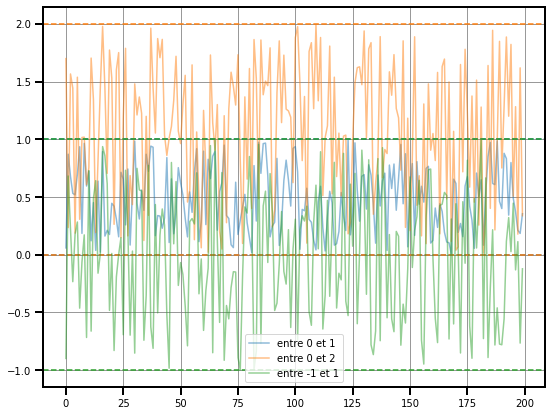

In [5]:
plt.figure(figsize=(9, 7))
npts = 200
plt.plot(np.random.random(npts), alpha=.5, label="entre 0 et 1")
plt.axhline(0, linestyle="--", color="C0")
plt.axhline(1, linestyle="--", color="C0")
plt.plot(2 * np.random.random(npts), alpha=.5, label="entre 0 et 2")
plt.axhline(0, linestyle="--", color="C1")
plt.axhline(2, linestyle="--", color="C1")
plt.plot(2 * np.random.random(npts) - 1, alpha=.5, label="entre -1 et 1")
plt.axhline(-1, linestyle="--", color="C2")
plt.axhline(1, linestyle="--", color="C2")
plt.legend()

## 2) Marche aléatoire d'une particule

Commençons par regarder la marche aléatoire pour un seul objet ou une seule particule. 

### 2.1) Avec Scratch

Avec Scratch, on peut utiliser le bloc `glisser en 0.5 s` et donner les
positions avec un nombre aléatoire.

![blocs scratch](https://gitlab.com/gvallverdu/dm_cafe/-/raw/master/notebooks/scratch_random_walk.png)

Voici ce que ça donne :

![scratch random walk](https://gitlab.com/gvallverdu/dm_cafe/-/raw/master/notebooks/scratch_random_walk.gif)


### 2.2) Calcul des points avec python

La marche aléatoire est calculée de manière *itérative*. Si
$n$ est le nombre de pas, la position suivante ($n+1$) est déterminée en fonction 
de la position précédente ($n$). Le principe est
que la position suivante est obtenue en ajoutant à la position actuelle
un déplacement aléatoire. Mathématiquement cela s'écrit :

$$
x_{n+1} = x_n + \mathring{x}
$$

où $x_{n+1}$ est la nouvelle position, $x_n$ est la position actuelle
et $\mathring{x}$ est le déplacement aléatoire.

On considère que notre particule est repérée dans l'espace par ses
coordonnées $(x, y)$. Il faut donc faire avancer la particule suivant $x$
et suivant $y$ de manière aléatoire :

$$
\begin{cases}
x_{n+1} = x_n + \mathring{x} \\
y_{n+1} = y_n + \mathring{y} \\
\end{cases}
$$

Pour calculer la marche aléatoire, il faut qu'on décide quel est le point
de départ. C'est à dire la toute première position de la particule, c'est
celle pour $n=0$. On va choisir que $x_0=0$ et $y_0=0$. Il faut aussi choisir 
combien de pas on fait, on appellera ce nombre `nstep`.

In [6]:
# parametres
nstep = 10

# initialisation
x = 0.
y = 0.

# boucle
print(" pas          x          y")
for i in range(nstep):
    x = x + 2 * np.random.random() - 1
    y = y + 2 * np.random.random() - 1
    print(f"{i:4d} {x:10.4f} {y:10.4f}")

 pas          x          y
   0     0.8143    -0.7050
   1     1.2984    -1.1681
   2     1.8373    -1.7897
   3     2.5974    -0.9932
   4     1.9794    -0.0527
   5     1.0873    -0.4250
   6     1.9475    -0.9473
   7     1.8606    -0.3811
   8     1.5650    -0.0644
   9     2.0613    -1.0058


### 2.3) Représentation graphique

Si on veut tracer la trajectoire, il faut enregistrer les points au fur et 
à mesure, dans une liste. En python, les listes sont entre crochets.

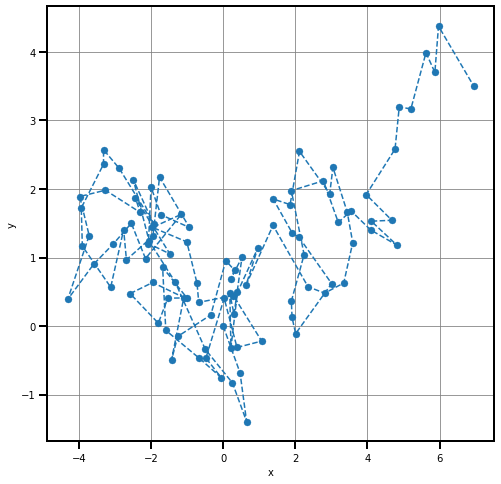

In [7]:
# parametres
nstep = 100

# initialisation
x = [0.]
y = [0.]

# boucle
for i in range(1, nstep + 1):
    # calcul des points
    x_new = x[i - 1] + 2 * np.random.random() - 1
    y_new = y[i - 1] + 2 * np.random.random() - 1

    # enregistrement dans la liste
    x.append(x_new)
    y.append(y_new)

# représentation graphique
plt.figure(figsize=(8, 8))
plt.plot(x, y, "o--")
plt.xlabel("x")
plt.ylabel("y");

### 2.4) Amplitude du déplacement

Suivant que l'on considère une petite molécule, un gros polymère ou une bactérie 
par exemple, à chaque pas, le déplacement sera plus ou moins grand. On peut
ajouter un paramètre à notre marche aléatoire pour définir l'amplitude du
déplacement. Au lieu d'avoir un déplacement entre -1 et 1, on aura un déplacement
d'une certaine amplitude, en positif ou en négatif, donc entre `-almplitude` et
`+amplitude`.

Mathématiquement, on peut l'écrire de cette manière
$$
\begin{cases}
x_{n+1} = x_n + w\,\mathring{x} \\
y_{n+1} = y_n + w\,\mathring{y} \\
\end{cases}
$$
où $w$ est l'amplitude et $\mathring{x}$ ou $\mathring{y}$ sont des nombres
aléatoires entre -1 et 1.

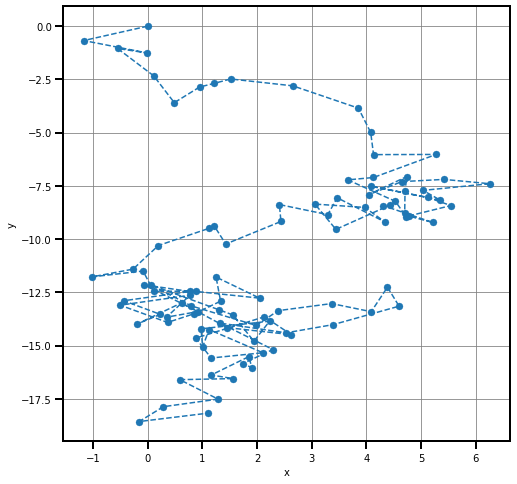

In [8]:
# parametres
nstep = 100
amplitude = 1.3  # cm (ou autre)

# initialisation
x = [0.]
y = [0.]

# boucle
for i in range(1, nstep + 1):
    # calcul des points
    x_new = x[i - 1] + amplitude * (2 * np.random.random() - 1)
    y_new = y[i - 1] + amplitude * (2 * np.random.random() - 1)

    # enregistrement dans la liste
    x.append(x_new)
    y.append(y_new)

# représentation graphique
plt.figure(figsize=(8, 8))
plt.plot(x, y, "o--")
plt.xlabel("x")
plt.ylabel("y");

## 3) Plusieurs particules

### 3.1) Deux particules

On peut calculer la trajectoire pour 2 particules de la même manière que
pour une particule.
Il suffit de dupliquer le code précédent sauf qu'on doit calculer les 
points $(x1, y1)$ pour la première particule et les points $(x2, y2)$ pour
la deuxième.

De plus, les deux particules ne vont pas partir du même point. On va choisir
aléatoirement la position des points de départ entre zéro et une longueur.

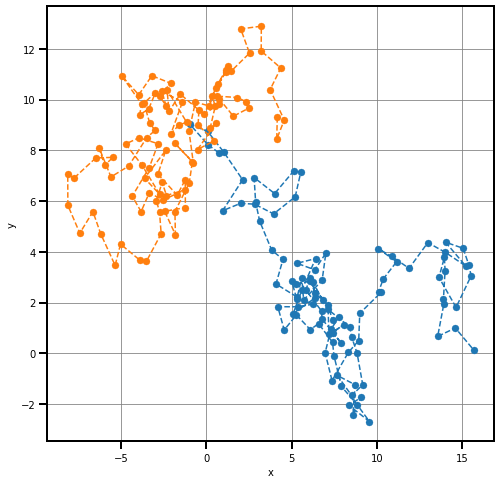

In [9]:
# parametres
nstep = 100
amplitude = 1.3  # cm (ou autre)
longueur = 10  # cm (ou autre)

# initialisation
# particule 1
x1 = [longueur * np.random.random()]
y1 = [longueur * np.random.random()]

# particule 2
x2 = [longueur * np.random.random()]
y2 = [longueur * np.random.random()]

# boucle
for i in range(1, nstep + 1):
    # calcul des points, particule 1
    x1_new = x1[i - 1] + amplitude * (2 * np.random.random() - 1)
    y1_new = y1[i - 1] + amplitude * (2 * np.random.random() - 1)

    # calcul des points, particule 2
    x2_new = x2[i - 1] + amplitude * (2 * np.random.random() - 1)
    y2_new = y2[i - 1] + amplitude * (2 * np.random.random() - 1)

    # enregistrement dans la liste pour la particule 1
    x1.append(x1_new)
    y1.append(y1_new)

    # enregistrement dans la liste pour la particule 2
    x2.append(x2_new)
    y2.append(y2_new)

# représentation graphique
plt.figure(figsize=(8, 8))
plt.plot(x1, y1, "o--")
plt.plot(x2, y2, "o--")
plt.xlabel("x")
plt.ylabel("y");

### 3.2) Plusieurs particules

En fait, on ne fait pas comme ça en informatique car ça oblige à recopier 
des lignes de codes. Chaque fois qu'on recopie, on peut faire une erreur.
Et imagine si tu devais le faire pour 100 particules !! Ça fait beaucoup de
choses à recopier. On utilise donc des boucles. Chaque fois qu'il faut répéter
une action, c'est à l'ordinateur de le faire, en utilisant une boucle.

Dans le code ci-dessous, on ajoute un nouveau paramètres qui détermine le
nombre de particules que l'on veut considérer.

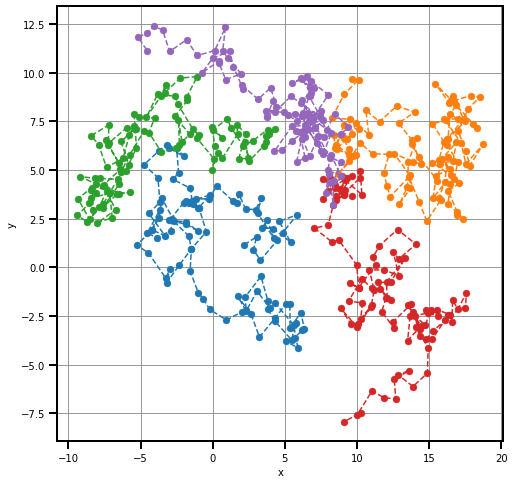

In [10]:
# parametres
nstep = 100
amplitude = 1.3  # cm (ou autre)
longueur = 10  # cm (ou autre)
n_particules = 5

# initialisation
x = [[longueur * np.random.random()] for ipart in range(n_particules)]
y = [[longueur * np.random.random()] for ipart in range(n_particules)]

# boucle 1 : les pas de la marche
for step in range(1, nstep + 1):

    # boucle 2 : les particules
    for ipart in range(n_particules):
        x_new = x[ipart][step - 1] + amplitude * (2 * np.random.random() - 1)
        y_new = y[ipart][step - 1] + amplitude * (2 * np.random.random() - 1)

        # enregistrement des positions
        x[ipart].append(x_new)
        y[ipart].append(y_new)

# représentation graphique
plt.figure(figsize=(8, 8))
for ipart in range(n_particules):
    plt.plot(x[ipart], y[ipart], "o--")
plt.xlabel("x")
plt.ylabel("y");

### 3.3) Code plus efficace

Pour être plus efficace, on peut utiliser des fonctions de numpy. En
effet, on peut demander à numpy de calculer directement plusieurs nombres
aléatoires dans un intervalle donné. Pour cela, on utilise la fonction 
`np.random.uniform()` si on veut que toutes les valeurs de l'intervalle aient
la même probabilité.

D'autres part, `numpy` permet de faire des opérations dites vectorielles
qui permettent d'éviter d'écrire certaines boucles. Par exemple, on peut 
éviter d'écrire la boucle sur les particules.

Voici comment obtenir 10 nombres aléatoires avec une probabilité uniforme, entre -3 et 3 :

In [11]:
np.random.uniform(-3, 3, size=10)

array([-0.63643378, -1.83860298,  0.78219023,  0.66063245,  0.49242137,
       -2.48460465,  0.46047698, -0.87192053,  0.97632576, -0.33836942])

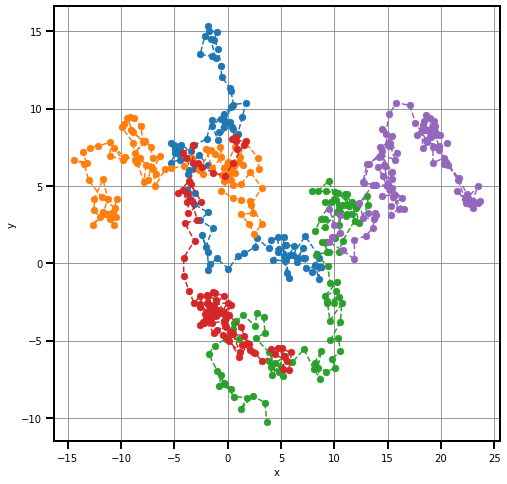

In [12]:
# parametres
nstep = 100
amplitude = 1.3  # cm (ou autre)
longueur = 10  # cm (ou autre)
n_particules = 5

# initialisation
x = [np.random.uniform(0, longueur, size=n_particules)]
y = [np.random.uniform(0, longueur, size=n_particules)]

# boucle 1 : les pas de la marche
for step in range(1, nstep + 1):

    # marche des particules
    x_new = x[step - 1] + np.random.uniform(-amplitude, amplitude, size=n_particules)
    y_new = y[step - 1] + np.random.uniform(-amplitude, amplitude, size=n_particules)

    # enregistrement des positions
    x.append(x_new)
    y.append(y_new)

# Conversion des listes en tableaux
x = np.array(x)
y = np.array(y)

# représentation graphique
plt.figure(figsize=(8, 8))
for ipart in range(n_particules):
    # affichage des trajectoires
    plt.plot(x[:, ipart], y[:, ipart], "o--")
plt.xlabel("x")
plt.ylabel("y");

## 4) Pour aller plus loin

Pour compléter, on peut ajouter deux caractéristiques à notre marche 
aléatoire. On peut
* imposer des conditions périodiques, pour contraindre les particules dans une boîte.
* imposer une distance minimale entre les particules (contacts ou collisions)

En plus des boucles, ces étapes nécessitent de faire des tests.

### 4.1) Utilisation d'une boîte pour la simulation

Nous allons limiter la trajectoire à une boîte de simulation. Pour cela
on applique ce qu'on appelle des *conditions périodiques aux limites*. 
On impose que les positions $x$ et $y$ soient confinées entre 0 et la 
longueur donnée en paramètre.

* si la particule dépasse la borne supérieure de la boîte on retranche une fois la longueur
* si la particule dépasse la borne inférieure de la boîte on ajoute une fois la longueur

Dans notre programme, les particules sont confinées entre 0 et la longueur
de la boîte.

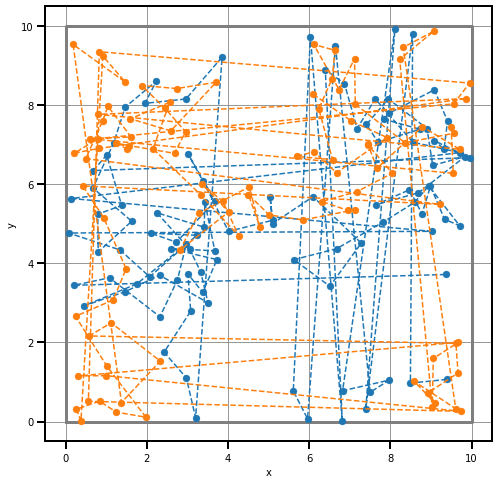

In [13]:
# parametres
nstep = 100
amplitude = 1.3  # cm (ou autre)
longueur = 10  # cm (ou autre)
n_particules = 2

# initialisation
x = [np.random.uniform(0, longueur, size=n_particules)]
y = [np.random.uniform(0, longueur, size=n_particules)]

# boucle 1 : les pas de la marche
for step in range(1, nstep + 1):

    # marche des particules
    x_new = x[step - 1] + np.random.uniform(-amplitude, amplitude, size=n_particules)
    y_new = y[step - 1] + np.random.uniform(-amplitude, amplitude, size=n_particules)

    # conditions périodiques
    # si la particule dépasse la longueur, on la retranche
    x_new = np.where(x_new > longueur, x_new - longueur, x_new)
    y_new = np.where(y_new > longueur, y_new - longueur, y_new)
    # si la position est inférieure à 0 on ajoute la longueur
    x_new = np.where(x_new < 0, x_new + longueur, x_new)
    y_new = np.where(y_new < 0, y_new + longueur, y_new)

    # enregistrement des positions
    x.append(x_new)
    y.append(y_new)

# Conversion des listes en tableaux
x = np.array(x)
y = np.array(y)

# représentation graphique
plt.figure(figsize=(8, 8))
plt.plot([0, longueur, longueur, 0, 0], [0, 0, longueur, longueur, 0], "C7-", lw=3)
for ipart in range(n_particules):
    plt.plot(x[:, ipart], y[:, ipart], "o--")
plt.xlabel("x")
plt.ylabel("y");

### 4.2) Distance entre les particules

On va calculer la distance entre les particules. La distance $d_{AB}$ entre 
deux points $A$ et $B$ se calcule avec la formule suivante :
$$
d_{AB} = \sqrt{(x_A - x_B)^2 + (y_A - y_B)^2}
$$
De plus, il faut tenir compte des conditions périodiques. On appelle cela
la convention de l'image la plus proche. C'est à dire qu'on cherche la
distance la plus courte entre deux particules en considérant les conditions
périodiques. Avant de calculer la distance entre deux particules, on
vérifie s'il n'existerait pas une distance plus courte, en ajoutant ou 
retranchant une fois la longueur à la position d'une des deux particules.

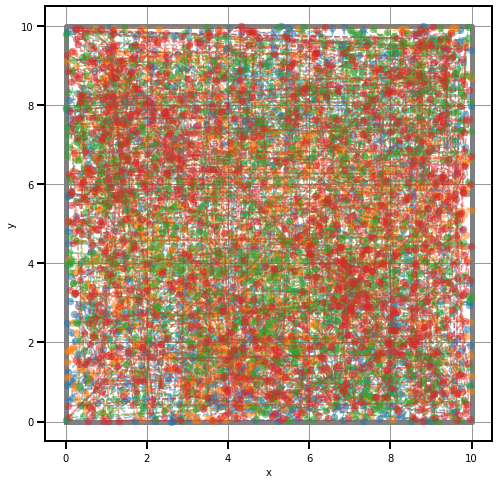

In [14]:
# parametres
nstep = 1000
amplitude = 1.3  # cm (ou autre)
longueur = 10  # cm (ou autre)
n_particules = 4

# initialisation
x = [np.random.uniform(0, longueur, size=n_particules)]
y = [np.random.uniform(0, longueur, size=n_particules)]

# tableau pour enregistrer les distances
distances = list()

# boucle 1 : les pas de la marche
for step in range(1, nstep + 1):

    # marche des particules
    x_new = x[step - 1] + np.random.uniform(-amplitude, amplitude, size=n_particules)
    y_new = y[step - 1] + np.random.uniform(-amplitude, amplitude, size=n_particules)

    # conditions périodiques
    # si la particule dépasse la longueur, on la retranche
    x_new = np.where(x_new > longueur, x_new - longueur, x_new)
    y_new = np.where(y_new > longueur, y_new - longueur, y_new)
    # si la position est inférieure à 0 on ajoute la longueur
    x_new = np.where(x_new < 0, x_new + longueur, x_new)
    y_new = np.where(y_new < 0, y_new + longueur, y_new)

    # distances entre les particules
    for ipart in range(n_particules - 1):
        for jpart in range(ipart + 1, n_particules):

            # convention de l'image la plus proche :
            # Si la distance est supérieure à la moitié de la boîte
            # on retranche une fois la longueur
            dx = abs(x_new[ipart] - x_new[jpart])
            if dx > longueur / 2:
                dx -= longueur
            dy = abs(y_new[ipart] - y_new[jpart])
            if dy > longueur / 2:
                dy -= longueur
            
            # clacul de la distance
            distance = np.sqrt(dx ** 2 + dy ** 2)
            distances.append(distance)

    # enregistrement des positions
    x.append(x_new)
    y.append(y_new)

# Conversion des listes en tableaux
x = np.array(x)
y = np.array(y)

# représentation graphique
plt.figure(figsize=(8, 8))
plt.plot([0, longueur, longueur, 0, 0], [0, 0, longueur, longueur, 0], "C7-", lw=5)
for ipart in range(n_particules):
    plt.plot(x[:, ipart], y[:, ipart], "o--", alpha=.5)
plt.xlabel("x")
plt.ylabel("y");

Voyons ce qu'on obtient comme valeurs de distances. Pour cela, on construit
un histogramme, c'est à dire qu'on compte, combien de valeurs de distances
sont obtenus dans un intervale donné (par exemple entre 2 et 2.5 cm).

De plus, on affiche sur le graphique :
* en vert la valeur minimale
* en rouge la valeur maximale
* en orange la valeur moyenne

(-0.5, 10.0)

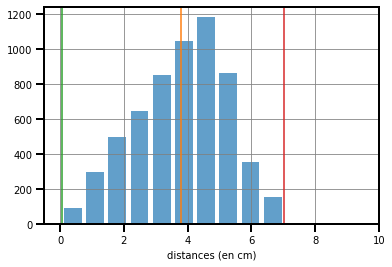

In [15]:
plt.hist(distances, rwidth=.8, alpha=.7)
plt.xlabel("distances (en cm)")
plt.axvline(min(distances), color="C2")
plt.axvline(max(distances), color="C3")
plt.axvline(np.mean(distances), color="C1")
plt.xlim(-0.5, 10)

### 4.3) Ajout d'une distance minimale

Pour se rapprocher d'un cas plus réel, il manque un dernier élément.
Il faut tenir compte du fait que deux objets ne peuvent pas être au même 
moment au même endroit car ils possèdent une certaine taille. C'est à 
dire que la distance entre deux particules ne peut pas être plus petite 
qu'une certaine valeur.

Dans l'exemple ci-dessous, on va simplement ajouter une contrainte dans
notre marche aléatoire en refusant le pas si une distance entre 2 particules 
est plus courte 
qu'une certaine valeur. Pour aller plus loin et être plus précis
il faudrait calculer les
paramètres associés à la collision entre les particules. C'est ce qu'on
appelle un modèle de sphères dures. C'est un modèle basique mais assez courant
en physique.

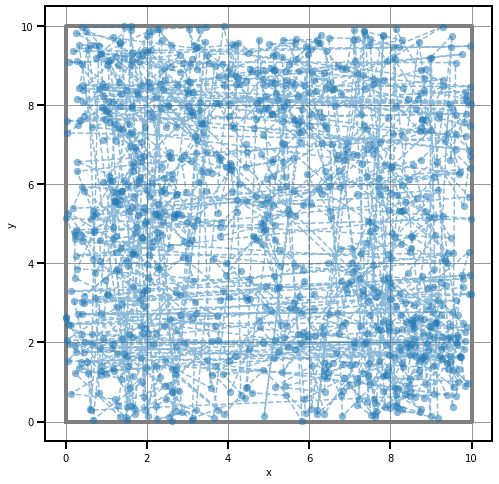

In [16]:
# parametres
nstep = 1000
amplitude = 1.3  # cm (ou autre)
longueur = 10  # cm (ou autre)
n_particules = 4
d_min = 2.  # distance minimale, en cm (ou autre)

# initialisation
x = [np.random.uniform(0, longueur, size=n_particules)]
y = [np.random.uniform(0, longueur, size=n_particules)]

# tableau pour enretisgrer les distances
distances = list()

# boucle 1 : les pas de la marche
step = 1
while step < nstep:

    # marche des particules
    x_new = x[step - 1] + np.random.uniform(-amplitude, amplitude, size=n_particules)
    y_new = y[step - 1] + np.random.uniform(-amplitude, amplitude, size=n_particules)

    # conditions périodiques
    # si la particule dépasse la longueur, on la retranche
    x_new = np.where(x_new > longueur, x_new - longueur, x_new)
    y_new = np.where(y_new > longueur, y_new - longueur, y_new)
    # si la position est inférieure à 0 on ajoute la longueur
    x_new = np.where(x_new < 0, x_new + longueur, x_new)
    y_new = np.where(y_new < 0, y_new + longueur, y_new)

    # distances entre les particules
    step_distances = list()
    contact = False
    for ipart in range(n_particules - 1):
        for jpart in range(ipart + 1, n_particules):

            # condition périodique
            dx = abs(x_new[ipart] - x_new[jpart])
            if dx > longueur / 2:
                dx -= longueur
            dy = abs(y_new[ipart] - y_new[jpart])
            if dy > longueur / 2:
                dy -= longueur
            
            # clacul de la distance
            distance = np.sqrt(dx ** 2 + dy ** 2)
            step_distances.append(distance)
            if distance < d_min:
                contact = True

    # s'il n'y a pas de contact, on enregistre le pas
    if not contact:
        # enretistrement des distances
        [distances.append(d) for d in step_distances]

        # enregistrement des positions
        x.append(x_new)
        y.append(y_new)

        step += 1

# Conversion des listes en tableaux
x = np.array(x)
y = np.array(y)

# représentation graphique
plt.figure(figsize=(8, 8))
plt.plot([0, longueur, longueur, 0, 0], [0, 0, longueur, longueur, 0], "C7-", lw=4)
# pour êre plus clair, on n'affiche qu'une seule trajectoire
plt.plot(x[:, 0], y[:, 0], "o--", alpha=.5)
# for ipart in range(n_particules):
#     plt.plot(x[:, ipart], y[:, ipart], "o--", alpha=.5)
plt.xlabel("x")
plt.ylabel("y");

Voyons, ce qu'on obtient comme valeurs de distances. Si on compare au cas
précédent, sans distance limite, on peut voir qu'aucune distances entre 0 et 2 n'a
été calculées.

(-0.5, 10.0)

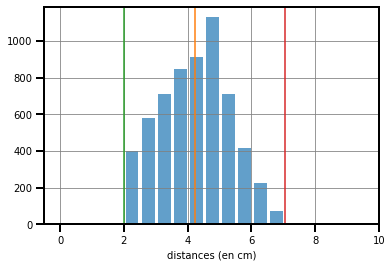

In [17]:
plt.hist(distances, rwidth=.8, alpha=.7)
plt.xlabel("distances (en cm)")
plt.axvline(min(distances), color="C2")
plt.axvline(max(distances), color="C3")
plt.axvline(np.mean(distances), color="C1")
plt.xlim(-0.5, 10)